## 1. Importando as bibliotecas

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Carregando os dados.

In [2]:
dataset = keras.datasets.fashion_mnist

 - Definindo as amostras de treino e teste.

In [3]:
((X_treino, Y_treino), (X_teste, Y_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 3. Exploração dos dados.

In [4]:
len(X_treino)
X_treino.shape
X_teste.shape
len(Y_teste)

10000

In [5]:
Y_treino.shape

(60000,)

In [6]:
#  verificando o total de classificações
print(Y_treino.min())
print(Y_treino.max())

0
9


 Como pode ser visto acima o total de classficações é igual a 10.

## 4. Visualização dos dados.

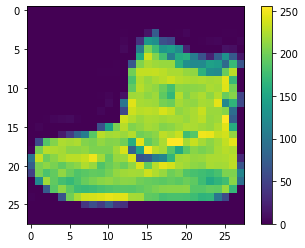

In [7]:
plt.imshow(X_treino[0])
plt.colorbar()

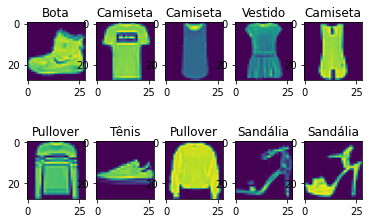

In [8]:
# criou-se a lista com o nome referentes a cada peça, através dos dados fornecidos na documentação
# https://github.com/zalandoresearch/fashion-mnist

nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(X_treino[imagem])
  plt.title(nomes_de_classificacoes[Y_treino[imagem]])

## 5. Criando o modelo.

 - Normalizando as imagens.

In [9]:
X_treino = X_treino/float(255)

- Criando, compilando, treinando e normalizando o modelo

In [10]:
modelo = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation = tensorflow.nn.relu),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10, activation = tensorflow.nn.softmax)

      ])


modelo.compile(optimizer='adam' , 
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])


historico = modelo.fit(X_treino, Y_treino, epochs= 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6753 - accuracy: 0.7606 - val_loss: 0.4064 - val_accuracy: 0.8540
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4083 - accuracy: 0.8511 - val_loss: 0.3674 - val_accuracy: 0.8683
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3648 - accuracy: 0.8680 - val_loss: 0.3801 - val_accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3348 - accuracy: 0.8756 - val_loss: 0.3500 - val_accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3246 - accuracy: 0.8811 - val_loss: 0.3290 - val_accuracy: 0.8833


 - Fazendo as predições e inspecionando o modelo

In [11]:
y_pred = modelo.predict(X_teste)

In [12]:
print('Valor predito :',np.argmax(y_pred[0]))
print('Valor real :',Y_teste[0])

Valor predito : 9
Valor real : 9


 - Testando para outros valores.

In [13]:
print('Valor predito :',np.argmax(y_pred[1]))
print('Valor real :',Y_teste[1])

Valor predito : 2
Valor real : 2


In [14]:
print('Valor predito :',np.argmax(y_pred[10]))
print('Valor real :',Y_teste[10])

Valor predito : 4
Valor real : 4


## 6. Visualização

 - Graficando a acurácia.

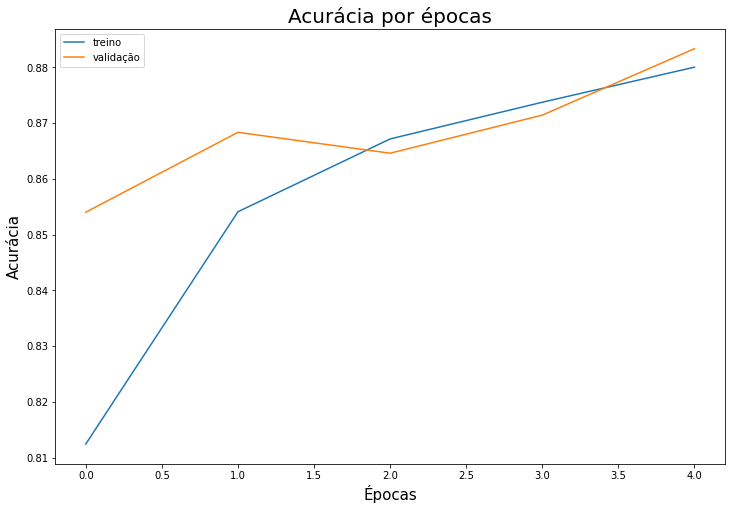

In [15]:
plt.figure(figsize=(12,8))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.legend(['treino','validação'])
plt.show()

 - Graficando a perda.

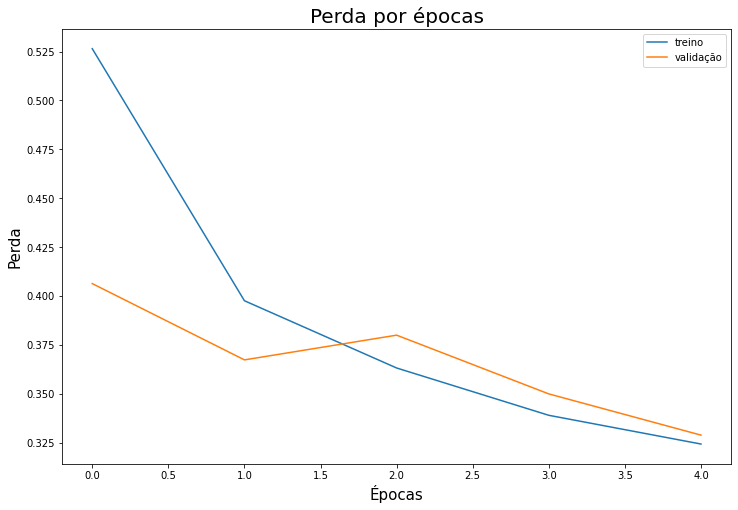

In [16]:
plt.figure(figsize=(12,8))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Perda', fontsize=15)
plt.legend(['treino','validação'])
plt.show()

## 7. Salvando e carregando o modelo treinado.

In [17]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

 - Verificando o modelo salvo.

In [18]:
Y_previsto = modelo.predict(X_teste)
print('resultado teste:', np.argmax(Y_previsto[1]))
print('número da imagem de teste:', Y_teste[1])

Y_previsto_modelo_salvo = modelo_salvo.predict(X_teste)
print('resultado teste modelo salvo:', np.argmax(Y_previsto_modelo_salvo[1]))
print('número da imagem de teste:', Y_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


 - Avaliando o modelo.

In [19]:
perda_teste, acuracia_teste = modelo.evaluate(X_teste, Y_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 55.5680 - accuracy: 0.8656
Perda do teste: 55.5679931640625
Acurácia do teste: 0.8655999898910522
